## Intro
## Foot_Plantar_Pressure_Points

/Users/lsw/work.Local/TF2_books_code_test/course_2020/Foot_Plantar_Pressure_Points

todo: move to note.py


## import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use("bmh")

import cv2
import tensorflow as tf






In [266]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use("bmh")

import cv2
import tensorflow as tf

from datetime import datetime
import seaborn as sns

import errno

# from adabelief_tf import AdaBeliefOptimizer

In [267]:
print(tf.__version__)
print(cv2.__version__)

2.3.1
4.3.0


### 1. EDA

a simple Exploratory Data Analysis

In [268]:
def get_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def get_img_by_id(df_index):
    img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]
    t_img_p = 'train/images/' + img_name
    return get_img(t_img_p)

    
def what_dtype(data):
    return print(f'dtype: {data.dtype}, shape: {data.shape}')
    
def plt_img(img):
    #plt.figure(figsize=(6,6))
#     plt.title(f'dtype: {img.dtype}')
    plt.axis("off")
    plt.imshow(img)

def plt_points(img, x, y):
    cv2.circle(img, (x,y), 3, (0,0,213), -1)
    
def cvshow_img(img):
    """cvshow_img(img) display imgage with OS's app window not in the notebook."""
    cv2.imshow('cv image', img)
    cv2.waitKey(500)
    cv2.destroyAllWindows()

dtype: uint8, shape: (400, 120, 3)


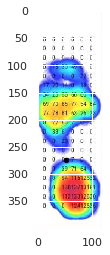

In [269]:
t_img_p = 'train/images/image_0001.png'
img = get_img(t_img_p)
plt.figure()
plt.imshow(img)

what_dtype(img)

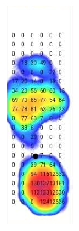

In [270]:
plt_img(img)

In [271]:
ann = 'train/annotation.csv'
df = pd.read_csv(ann)

### 

In [272]:
df.head()

,images,x1,y1,x2,y2
0,image_0001.png,55,136,75,383
1,image_0002.png,62,139,42,385
2,image_0003.png,47,117,76,368
3,image_0004.png,66,119,37,376
4,image_0005.png,58,147,85,381


In [273]:
df.describe()

,x1,y1,x2,y2
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,57.679000,133.471000,54.78000,377.934000
std,8.145693,14.154629,24.19804,7.757049
min,24.000000,99.000000,10.00000,334.000000
25%,53.000000,122.750000,31.00000,375.000000
50%,58.000000,136.000000,53.50000,381.000000
75%,62.250000,142.000000,78.00000,383.000000
max,84.000000,182.000000,96.00000,387.000000


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
images    1000 non-null object
x1        1000 non-null int64
y1        1000 non-null int64
x2        1000 non-null int64
y2        1000 non-null int64
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [275]:
df.columns

Index(['images', 'x1', 'y1', 'x2', 'y2'], dtype='object')

In [276]:
df.shape

(1000, 5)

In [277]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [278]:
df.iloc[0:2,:]

,images,x1,y1,x2,y2
0,image_0001.png,55,136,75,383
1,image_0002.png,62,139,42,385


In [279]:
print(f'df list size : {len(df)}, Index: {df.index}')

df_index = 0
print(f'Image: {df.images[df_index]} x1:{df.x1[df_index]} y1:{df.y1[df_index]} x1:{df.x2[df_index]} y1:{df.y2[df_index]}')

df list size : 1000, Index: RangeIndex(start=0, stop=1000, step=1)
Image: image_0001.png x1:55 y1:136 x1:75 y1:383


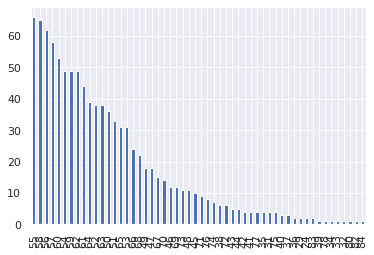

In [280]:
df.x1.value_counts().plot(kind="bar")

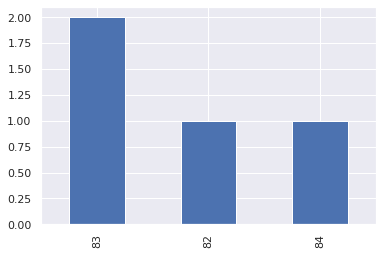

In [281]:
df[df.x1 > 80].x1.value_counts().plot(kind="bar")

In [282]:
# the range of pp points.
print(f'x1: {df.x1.min()} ~ {df.x1.max()},\t mean: {df.x1.mean()},\t x1-bound-len: {df.x1.max() - df.x1.min()}')
print(f'y1: {df.y1.min()} ~ {df.y1.max()},\t mean: {df.y1.mean()},\t y1-bound-len: {df.y1.max() - df.y1.min()}')
print(f'x2: {df.x2.min()} ~ {df.x2.max()},\t mean: {df.x2.mean()},\t x2-bound-len: {df.x2.max() - df.x2.min()}')
print(f'y2: {df.y2.min()} ~ {df.y2.max()},\t mean: {df.y2.mean()},\t y2-bound-len: {df.y2.max() - df.y2.min()}')

x1: 24 ~ 84,	 mean: 57.679,	 x1-bound-len: 60
y1: 99 ~ 182,	 mean: 133.471,	 y1-bound-len: 83
x2: 10 ~ 96,	 mean: 54.78,	 x2-bound-len: 86
y2: 334 ~ 387,	 mean: 377.934,	 y2-bound-len: 53


Although the limit bound of x12, y12 are lower than 100 pixels, using the same dimension of the x-axis (width of the whole heel) may better fit the 'heel''s left and right phenomena.

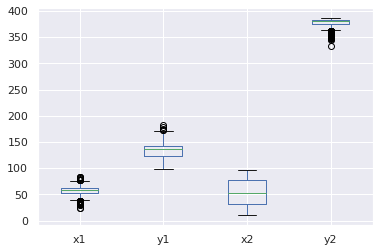

In [283]:
df[1:].plot(kind='box')

CPU times: user 2.66 s, sys: 18.7 ms, total: 2.68 s
Wall time: 2.65 s


Text(0.5, 1.0, 'Scatter Plot')

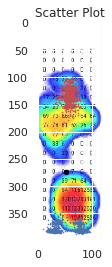

In [284]:
%%time
# plt.figure(figsize=(1.2,4.0))
# plt.xlim(0,120)
# plt.ylim(0,400)
# plt_img(img)

plt.imshow(img)
for df_index in range(1000):
    plt.plot(df.x1[df_index], df.y1[df_index], 'r.', markersize=1)
    plt.plot(df.x2[df_index], df.y2[df_index], 'b.', markersize=1)
plt.title("Scatter Plot")

In [285]:
# check y1 range
df[df.y1 > 180]

,images,x1,y1,x2,y2
662,image_0663.jpg,48,182,53,383


### 正確分佈
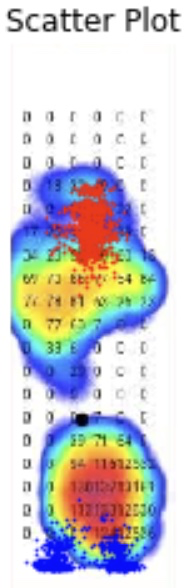


x1y1 55 136
x2y2 75 383
matplotlib/cv2以左上角原點，np以row,column對應則為：x=column, y=row


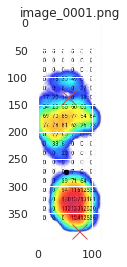

In [286]:
df_index = 0
img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]

t_img_p = 'train/images/' + img_name
img = get_img(t_img_p)
plt.figure()
plt.imshow(img)
plt.plot(df.x1[df_index], df.y1[df_index], 'rx', markersize=15)
plt.plot(df.x2[df_index], df.y2[df_index], 'rx', markersize=15)
plt.title(img_name)

print('x1y1', df.x1[df_index], df.y1[df_index])
print('x2y2', df.x2[df_index], df.y2[df_index])
print('matplotlib/cv2以左上角原點，np以row,column對應則為：x=column, y=row')

CPU times: user 10.1 ms, sys: 4.03 ms, total: 14.2 ms
Wall time: 11.9 ms


Text(0.5, 1.0, 'Scatter Plot')

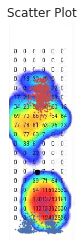

In [287]:
%%time
# plt.figure(figsize=(1.2,4.0))

plt_img(img)
plt.plot(df.x1, df.y1, 'r.', markersize=1)
plt.plot(df.x2, df.y2, 'b.', markersize=1)
plt.title("Scatter Plot")

# plt.xlim(0,120)
# plt.ylim(0,400)

CPU times: user 11.4 ms, sys: 153 µs, total: 11.6 ms
Wall time: 9.81 ms


Text(0.5, 1.0, 'Scatter Plot upside down')

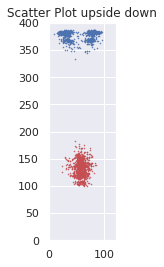

In [288]:
%%time
plt.figure(figsize=(1.2,4.0))
plt.ylim(0,400)
plt.xlim(0,120) #somehow add the x-ylim cause the upside down.

# plt_img(img)
plt.plot(df.x1, df.y1, 'r.', markersize=1)
plt.plot(df.x2, df.y2, 'b.', markersize=1)
plt.title("Scatter Plot upside down")

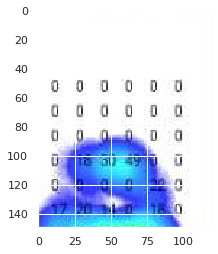

In [289]:
# 注意toe切割，要以y1最大範圍為準. y1: 99 ~ 182,	 mean: 133.471

# When image[x,y], 
# if array[row, column] = [0:150, 0:200]

plt.imshow(img[0:150, 0:200])

In [290]:
def plt_ud_points(df_index):
    img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]

    t_img_p = 'train/images/' + img_name
    img = get_img(t_img_p)
#     plt.figure()
    plt.imshow(img)
    plt.plot(df.x1[df_index], df.y1[df_index], 'r+', markersize=15)
    plt.plot(df.x2[df_index], df.y2[df_index], 'b+', markersize=15)
    plt.axis("off")
    plt.title(img_name)

def plt_ud_points_lines(df_index):
    img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]

    t_img_p = 'train/images/' + img_name
    img = get_img(t_img_p)
#     plt.figure()
    plt.imshow(img)
    plt.plot(df.x1[df_index], df.y1[df_index], 'r+', markersize=15, mew=3)
    plt.plot(df.x2[df_index], df.y2[df_index], 'b+', markersize=15, mew=3)
    # line
    x = [df.x1[df_index], df.x2[df_index]]
    y = [df.y1[df_index], df.y2[df_index]]
    plt.plot(x, y, 'k-', lw=3)
    
    plt.axis("off")
    plt.title(img_name)
    
def plt_ud_point(df_index):
    img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]

    t_img_p = 'train/images/' + img_name
    img = get_img(t_img_p)
    plt.figure()
    plt.imshow(img)
    plt.plot(df.x1[df_index], df.y1[df_index], 'r+', markersize=15)
    plt.plot(df.x2[df_index], df.y2[df_index], 'b+', markersize=15)
    print(f'up[{df.x1[df_index]}, {df.y1[df_index]}], down[{df.x2[df_index]}, {df.y2[df_index]}]')
    plt.axis("off")
    plt.title(img_name)

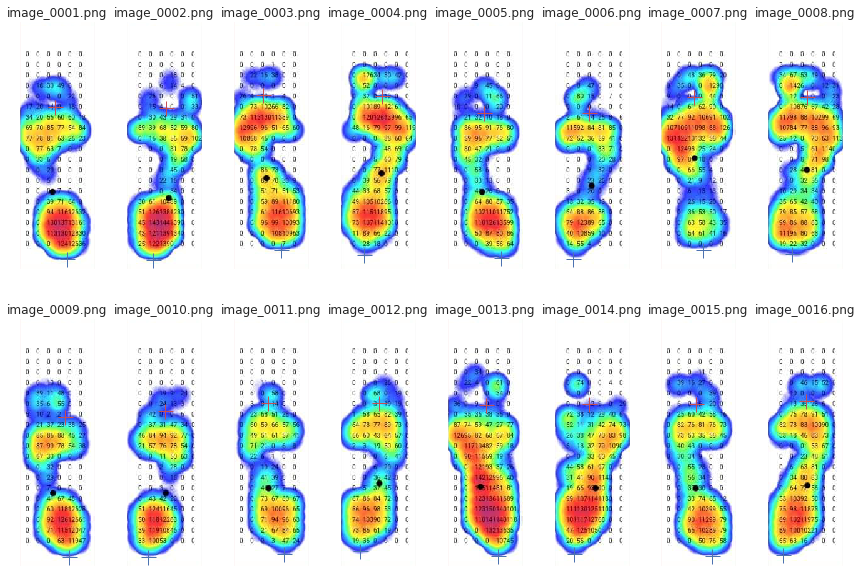

In [291]:
"""
image_0205.jpg 僅有右腳 打亂後面的12左右 34左右排序
"""

"""
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing non-integers 
as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

plt.subplot(cr/2, cr*2, i-step+1) ->>  plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
"""
head_num = 16
step = 0 # each 10s
col_row = np.sqrt(int(head_num))
cr = col_row

plt.figure(figsize=(15, 10))
for i in range(step, step+head_num):
    if step > 200:
        ax = plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
    else:
        ax = plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
    plt_ud_points(i)


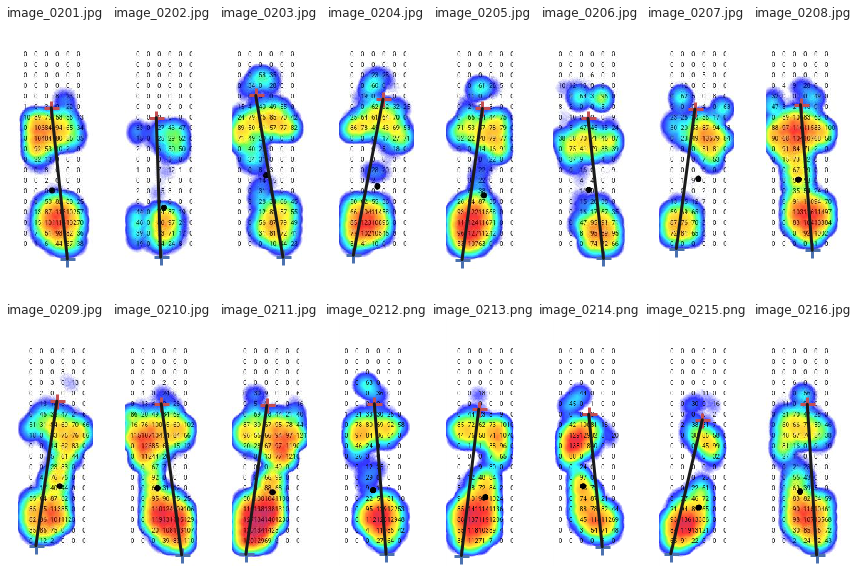

In [292]:
"""
image_0205.jpg 僅有右腳 打亂後面的12左右 34左右排序
"""
head_num = 16
step = 200 # each 10s
col_row = np.sqrt(int(head_num))
cr = col_row

plt.figure(figsize=(15, 10))
for i in range(step, step+head_num):
    if step > 200:
        ax = plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
    else:
        ax = plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
    plt_ud_points_lines(i)


CPU times: user 5.62 s, sys: 110 ms, total: 5.73 s
Wall time: 5.68 s


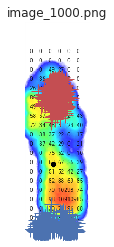

In [293]:
%%time
for i in range(1000):
    plt_ud_points(i)

up[50, 154], down[57, 380]


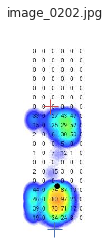

In [294]:
plt_ud_point(201)

up[63, 137], down[38, 381]


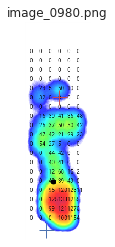

In [295]:
#image_0980.png is wrong data.
plt_ud_point(980-1)

### trail 1
        (1) band rejection (排除黑字和黑點)
        (2) median filter (黑字和黑點補色)
        (3) color conversion (將彩色轉換成壓力)

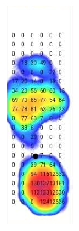

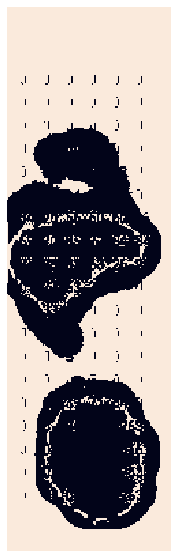

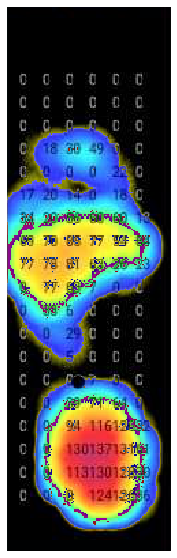

In [296]:
# org image
t_img_p = 'train/images/' + img_name
img = get_img(t_img_p)
# plt.figure(figsize=(15, 10))
plt.figure()
plt_img(img)


# mask some color
t_img_p = 'train/images/' + img_name
img = get_img(t_img_p)

# create NumPy arrays from the boundaries
lower = [100, 100, 100]
upper = [255, 255, 255]
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")
# find the colors within the specified boundaries and apply
# the mask
mask = cv2.inRange(img, lower, upper)
plt.figure(figsize=(3,10))
plt_img(mask)


# output = cv2.bitwise_and(img, img, mask = mask)
output = cv2.bitwise_not(img, img, mask = mask)
plt.figure(figsize=(3,10))
plt_img(output)



### 左右判斷
依據足跟分佈靠左靠右則為右腳左腳

取ROI投影於x軸上，取分佈重心位置。

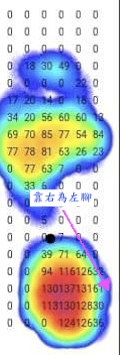

<Figure size 1080x720 with 0 Axes>

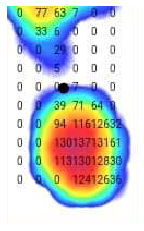

In [297]:
# crop Heel (the lower part of image) #
img = get_img_by_id(0)

# crop location
x=200
y=0
w=400
h=120

# crop location, rows, columns
row=200
col=0
rows=400
cols=120


# crop_image = img[x:w, y:h]
crop_image = img[row:rows, col:cols]


# cv2.imshow("Cropped", crop_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(15, 10))
plt.figure()
plt_img(crop_image)

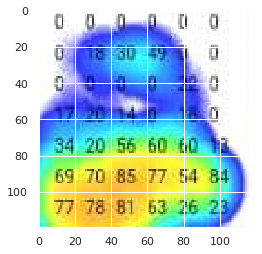

In [298]:
# 注意toe切割，要以y1最大範圍為準. y1: 99 ~ 182,	 mean: 133.471

# When image[x,y], 
# if array[row, column] = [0:150, 0:120]

# plt.imshow(img[0:150, 0:120])
plt.imshow(img[80:200, 0:120])
# plt.imshow(img[y_offset_toe:y_offset_toe+120, 0:120])

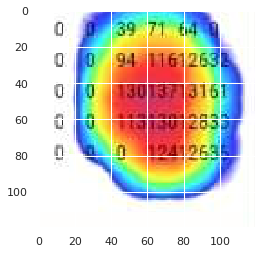

In [299]:
# heel
plt.imshow(img[280:280+120, 0:120])

# plt.imshow(img[y_offset_heel:y_offset_heel+120, 0:120])

### 2. Parameters

#### Image size, Batch size, toe/heel-offset.

In [300]:
BATCH_SIZE = 1 # 16 #32 #64 #128 #32 #64 #todo: reduce the BS maybe help to reduce the loss
img_height = 120 #512 #224 #100
img_width = 120 #512 #224 #100

y_offset_toe = 80
y_offset_heel = 280 #400-120=280

#### tf MirroredStrategy seting

In [301]:

# tf MirroredStrategy seting
strategy = tf.distribute.MirroredStrategy()
REPLICAS = strategy.num_replicas_in_sync
print('\nNumber of REPLICAS: {}\n'.format(REPLICAS))


MULTI_BATCH_SIZE = BATCH_SIZE * strategy.num_replicas_in_sync
print('BATCH_SIZE: {}, MULTI_BATCH_SIZE: {}'.format(BATCH_SIZE, MULTI_BATCH_SIZE))



INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4', '/job:localhost/replica:0/task:0/device:GPU:5', '/job:localhost/replica:0/task:0/device:GPU:6', '/job:localhost/replica:0/task:0/device:GPU:7')

Number of REPLICAS: 8

BATCH_SIZE: 1, MULTI_BATCH_SIZE: 8


In [302]:
# 自動調節tf.data管道
AUTOTUNE = tf.data.experimental.AUTOTUNE

### 3. Create the training dataset W/ croped


#### Load samples as data-farame

In [303]:

# # data-org #
# ann = 'annotation_1424_merge.csv'
# im_p = 'train/images/'
# df[1335:]


# # data-org-augm#
# ann = 'annotation_2848_augm.csv'
# im_p = 'train_augm/images/'
# df[1335:]


# data-train #
# ann = 'annotation_1345_good.csv'
# im_p = 'train/images/'

# data-augm #
ann = 'annotation_2690_augm.csv'
im_p = 'train_augm/images/'
df[1335:]

# # data-train-HPL-1223
# ann = 'annotation_1123_HPL_Good.csv'
# im_p = 'train/images/'

df = pd.read_csv(ann)
df[1120:]

,images,x1,y1,x2,y2
1120,image_6195.jpg,52,127,75,370
1121,image_6196.jpg,62,138,29,383
1122,image_6197.jpg,54,135,78,380
1123,image_6198.jpg,60,125,29,384
1124,image_6199.jpg,51,147,70,353
...,...,...,...,...,...
2685,image_af-6419.jpg,60,135,50,381
2686,image_af-6421.jpg,67,157,44,376
2687,image_af-6422.jpg,71,154,87,375
2688,image_af-6423.jpg,56,149,44,381


#### Shuffle and reset index

In [304]:
# keep index
# df = df.sample(frac=1) #
# df.head(5)

In [305]:
# reset index
df = df.sample(frac=1).reset_index(drop=True)

In [306]:
df.head(10)

,images,x1,y1,x2,y2
0,image_af-0892.png,61,136,51,368
1,image_af-0628.jpg,46,130,46,384
2,image_af-0383.png,66,122,50,368
3,image_af-6008.png,56,151,88,384
4,image_af-0429.png,64,122,43,383
5,image_6407.jpg,52,140,80,380
6,image_af-0683.png,71,125,76,366
7,image_0869.png,58,123,28,381
8,image_0198.jpg,75,103,76,366
9,image_af-6211.jpg,61,120,50,378


See, the image_####.jpg now are random.

#### Create tf.dataset (DS)

In [307]:
# from dataframe
list_ds = tf.data.Dataset.from_tensor_slices((df['images'], df['x1'], df['y1'], df['x2'], df['y2']))
# list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=True) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle

In [308]:
len(list_ds)#.shape() #take(1)

2690

In [309]:
# check The type specification of an element of this dataset.
list_ds.element_spec


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [310]:
for f,x1,y1,x2,y2 in list_ds.take(5):
    print(f'take sample: {f} {x1} {y1} {x2} {y2}')

take sample: b'image_af-0892.png' 61 136 51 368
take sample: b'image_af-0628.jpg' 46 130 46 384
take sample: b'image_af-0383.png' 66 122 50 368
take sample: b'image_af-6008.png' 56 151 88 384
take sample: b'image_af-0429.png' 64 122 43 383


In [311]:
# use np decode to UTF-8
print(f.numpy().decode('UTF-8'))

image_af-0429.png


In [312]:
len(list_ds)

2690

#### Check ds iterator for consuming

In [313]:
# create a Python iterator

it_list_ds = iter(list_ds) # Make sure iter ds only once.

In [314]:
# using iter and consuming its elements using next: every print different image name.

for i in range(4):
    image, x1, y1, x2, y2 = next(it_list_ds)
    print(image.numpy(), x1.numpy(), y1.numpy())

b'image_af-0892.png' 61 136
b'image_af-0628.jpg' 46 130
b'image_af-0383.png' 66 122
b'image_af-6008.png' 56 151


In [315]:
# image_batch, label_batch = valid_ds_pre_s.as_numpy_iterator().next()
# pred = model.predict_on_batch(image_batch)


for i in range(4):
    image, x1, y1, x2, y2 = list_ds.as_numpy_iterator().next()# every time create a new iter, so need put iter out of above cell.
    print(image, x1, y1, x2, y2)
    
iter_test_list = list_ds.as_numpy_iterator()
print("===== Create iterator once and pull out to above cell. =====")
for i in range(4):
    image, x1, y1, x2, y2 = iter_test_list.next()
    print(image, x1, y1, x2, y2)


b'image_af-0892.png' 61 136 51 368
b'image_af-0892.png' 61 136 51 368
b'image_af-0892.png' 61 136 51 368
b'image_af-0892.png' 61 136 51 368
===== Create iterator once and pull out to above cell. =====
b'image_af-0892.png' 61 136 51 368
b'image_af-0628.jpg' 46 130 46 384
b'image_af-0383.png' 66 122 50 368
b'image_af-6008.png' 56 151 88 384


#### Process path to image tensor in DS

In [316]:

'''
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    boolen = parts[-2] == class_names
    #one_hot_num = np.array(boolen, dtype=np.int) not works should use tf.x repalced.
    one_hot_num = tf.dtypes.cast(boolen, tf.int64)
    one_num = tf.argmax(one_hot_num)
    print('one_num:', one_num)
    # Integer encode the label
    return one_num

def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_jpeg(img, channels=3)
    # resize the image to the desired size
#     return tf.image.resize(img, [img_height, img_width])# augment 已經resize過一次了 但這邊不先做會比較慢
    return tf.cast(tf.image.resize(img, [img_height, img_width]), tf.uint8)# 避免float over at augment
'''

#
# map list to ds, Toe part.
#

def decode_crop_png_toe(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
    y1=y_offset_toe;    x1=0;    h=img_height;    w=img_width # not the pp location
    img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), h, w)
    #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
    # resize the image to the desired size
    return img

def process_path_toe(file_path,x1,y1,x2,y2):
    file_path = im_p + file_path
    #label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
    img = decode_crop_png_toe(img)
    return img, [x1,y1-y_offset_toe]

#
# map list to ds, Heel part.
#

def decode_crop_png_heel(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
    y2=y_offset_heel;    x2=0;    h=img_height;    w=img_width # not the pp location
    img = tf.image.crop_to_bounding_box(img, int(y2), int(x2), h, w)
    #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
    # resize the image to the desired size
    return img

def process_path_heel(file_path,x1,y1,x2,y2):
    file_path = im_p + file_path
    #label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
    img = decode_crop_png_heel(img)
    return img, [x2,y2-y_offset_heel]


#
# test how to put parameters to map
#

def t_ds_map(file_path,x1,y1,x2,y2):
#     img = get_img('train/images/' + str(file_path))
#     print(file_path)
    return file_path,x1,y1,x2,y2 #img, [x1,y1]
    

In [317]:
# Toe ds
train_ds_map_toe = list_ds.map(process_path_toe, num_parallel_calls=AUTOTUNE)

# Heel ds
train_ds_map_heel = list_ds.map(process_path_heel, num_parallel_calls=AUTOTUNE)

In [318]:
for img, xy in train_ds_map_toe.take(1):
    print(f'take sample: {f} {xy}')
    
print('f', f.dtype)
print('xy', xy.dtype)

take sample: b'image_af-0429.png' [61 56]
f <dtype: 'string'>
xy <dtype: 'int64'>


In [319]:
# for f,x1,y1,x2,y2 in train_ds_map.take(5):
#     print(f'take sample: {f} {x1} {y1} {x2} {y2}')

#### [new] Split train_ds_pre with ratio of validation %

In [320]:
# split Toe
val_size = int(tf.data.experimental.cardinality(train_ds_map_toe).numpy() * 0.2)

train_ds_map_toe_s = train_ds_map_toe.skip(val_size)
valid_ds_map_toe_s = train_ds_map_toe.take(val_size)

print(len(train_ds_map_toe))
print(val_size)
print(tf.data.experimental.cardinality(train_ds_map_toe_s).numpy())
print(tf.data.experimental.cardinality(valid_ds_map_toe_s).numpy())

2690
538
2152
538


In [321]:
# split Heel
val_size = int(tf.data.experimental.cardinality(train_ds_map_heel).numpy() * 0.2)

train_ds_map_heel_s = train_ds_map_heel.skip(val_size)
valid_ds_map_heel_s = train_ds_map_heel.take(val_size)

print(len(train_ds_map_heel))
print(val_size)
print(tf.data.experimental.cardinality(train_ds_map_heel_s).numpy())
print(tf.data.experimental.cardinality(valid_ds_map_heel_s).numpy())

2690
538
2152
538


#### prepare train_ds_prefetch

In [322]:
def configure_for_performance_cache_train(ds, cache=True, augment=False):

    
    """#TODO: need to check the parse logic of ds.cache.
    if cache:
        print("Check cache-f1 to file:", cache)
        if isinstance(cache, str):
            ds = ds.cache(cache)
            print("Check cache-f2 to file:", cache)
    else:
        ds = ds.cache()
        print("Check cache in memory:", cache)
    """    
    if cache:
        ds = ds.cache()
        print("Check cache in memory:Y", cache)
    else:
        print("Check cache in memory:N", cache)
        
    if augment:
#         ds = ds.map(data_augment, num_parallel_calls=AUTOTUNE)
        ds = ds.map(AA, num_parallel_calls=AUTOTUNE)
#         ds = ds.map(RA, num_parallel_calls=AUTOTUNE)
        print("Check augment :Y", augment)
    else:
        print("Check augment :N", augment)
    
    #ds = ds.repeat()#TODO:2020-12-14: test
    #ds = ds.shuffle(buffer_size=MULTI_BATCH_SIZE*2) # (buffer_size=MULTI_BATCH_SIZE*5) 6sec,buffer_size=1000 take few sec. or buffer_size=image_count <- take too long # each take ds take 30~45 sec, TODO!!
    ds = ds.shuffle(len(list_ds), reshuffle_each_iteration=True) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
    ds = ds.batch(MULTI_BATCH_SIZE)#MULTI_BATCH_SIZE for multi-GPUs
    ds = ds.prefetch(buffer_size=AUTOTUNE) #buffer_size=AUTOTUNE seem no speed improve
    
    print("Check ds cache[{}] and augment[{}]".format(cache, augment))
    
    return ds

def configure_for_performance_cache_val(ds, cache=True, augment=False):

    
    """#TODO: need to check the parse logic of ds.cache
    TODO:test remove ds.shuffle from val_ds.
    .
    if cache:
        print("Check cache-f1 to file:", cache)
        if isinstance(cache, str):
            ds = ds.cache(cache)
            print("Check cache-f2 to file:", cache)
    else:
        ds = ds.cache()
        print("Check cache in memory:", cache)
    """    
    if cache:
        ds = ds.cache()
        print("Check cache in memory:Y", cache)
    else:
        print("Check cache in memory:N", cache)
        
    if augment:
#         ds = ds.map(data_augment, num_parallel_calls=AUTOTUNE)
        ds = ds.map(AA, num_parallel_calls=AUTOTUNE)
#         ds = ds.map(RA, num_parallel_calls=AUTOTUNE)
        print("Check augment :Y", augment)
    else:
        print("Check augment :N", augment)
    
    #ds = ds.repeat()#TODO:2020-12-14: test
    #ds = ds.shuffle(buffer_size=MULTI_BATCH_SIZE*2) # (buffer_size=MULTI_BATCH_SIZE*5) 6sec,buffer_size=1000 take few sec. or buffer_size=image_count <- take too long # each take ds take 30~45 sec, TODO!!
#     ds = ds.shuffle(len(list_ds), reshuffle_each_iteration=False) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
    ds = ds.batch(MULTI_BATCH_SIZE)#MULTI_BATCH_SIZE for multi-GPUs
    ds = ds.prefetch(buffer_size=AUTOTUNE) #buffer_size=AUTOTUNE seem no speed improve
    
    print("Check ds cache[{}] and augment[{}]".format(cache, augment))
    
    return ds


In [323]:
# """
# Prepare the ds properties (cache, augment, bs, shuffle, prefetch, etc.) for better performance.
# """
# # Toe ds_pre
# train_ds_pre_toe = configure_for_performance_cache_train(train_ds_map_toe)

# # Heel ds_pre
# train_ds_pre_heel = configure_for_performance_cache_val(train_ds_map_heel)

#### All split ds_prefetch
* train_ds_map_toe_s = train_ds_map_toe.skip(val_size)
* valid_ds_map_toe_s = train_ds_map_toe.take(val_size)

* train_ds_map_heel_s = train_ds_map_heel.skip(val_size)
* valid_ds_map_heel_s = train_ds_map_heel.take(val_size)


In [324]:
"""
Prepare the ds properties (cache, augment, bs, shuffle, prefetch, etc.) for better performance.
"""
# Toe ds_pre
train_ds_pre_toe_s = configure_for_performance_cache_train(train_ds_map_toe_s)
valid_ds_pre_toe_s = configure_for_performance_cache_val(valid_ds_map_toe_s)

# Heel ds_pre
train_ds_pre_heel_s = configure_for_performance_cache_train(train_ds_map_heel_s)
valid_ds_pre_heel_s = configure_for_performance_cache_val(valid_ds_map_heel_s)

Check cache in memory:Y True
Check augment :N False
Check ds cache[True] and augment[False]
Check cache in memory:Y True
Check augment :N False
Check ds cache[True] and augment[False]
Check cache in memory:Y True
Check augment :N False
Check ds cache[True] and augment[False]
Check cache in memory:Y True
Check augment :N False
Check ds cache[True] and augment[False]


#### Check ds_prefetch samples

batch * multi: 8 , MULTI_BATCH_SIZE= 8


InvalidArgumentError: slice index 8 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

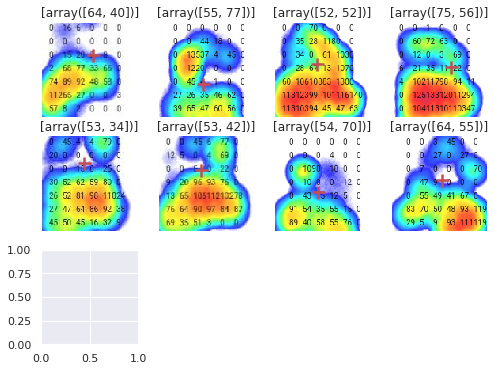

In [325]:
%%time

# plot_number_of_sample = MULTI_BATCH_SIZE
# col_size = row_size = int(np.sqrt(MULTI_BATCH_SIZE))
# # row_size = np.sqrt(MULTI_BATCH_SIZE)
# print(col_size)

plt.figure(figsize=(8, 8))
for images, labels in train_ds_pre_toe_s.take(1):
    print('batch * multi:', len(labels), ', MULTI_BATCH_SIZE=', MULTI_BATCH_SIZE)
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title([labels[i].numpy()])
        plt.axis("off")
        
        plt.plot(labels[i].numpy()[0], labels[i].numpy()[1], 'r+', markersize=13, mew=2.5)

In [326]:
# %%time

# plt.figure(figsize=(8, 8))
# for images, labels in train_ds_pre_heel_s.take(1):
#     print('batch * multi:', len(labels))
#     for i in range(16):
#         ax = plt.subplot(4, 4, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(str(labels[i].numpy()))
#         plt.axis("off")
        
#         plt.plot(labels[i].numpy()[0], labels[i].numpy()[1], 'b+', markersize=13, mew=2.5)
# #         print((labels[i].numpy()[0], labels[i].numpy()[1]))

In [327]:
# create it_ds once
it_train_ds_pre_toe = iter(train_ds_pre_toe_s)

In [328]:
# image_batch, label_batch = next(it_train_ds_pre_toe)

# plt.figure(figsize=(18, 18))
# for i in range(64):
#     ax = plt.subplot(8, 8, i + 1)
#     plt.imshow(image_batch[i].numpy().astype("uint8"))
#     plt.title('x1,y1:' + str(label_batch[i].numpy()))
#     plt.axis("off")
    
#     #print(label_batch[i])
#     plt.plot(label_batch[i].numpy()[0], label_batch[i].numpy()[1], 'r+', markersize=13, mew=2.5)

### [OLD] Split train_ds_pre

##### train_ds_pre_s
##### valid_ds_pre_s 

### re-set to toe/heel split
##### train_ds_pre_toe_s
##### valid_ds_pre_toe_s

##### train_ds_pre_heel_s
##### valid_ds_pre_heel_s

#### split Toe

In [329]:
# # split Toe
# val_size = int(tf.data.experimental.cardinality(train_ds_pre_toe).numpy() * 0.2)

# train_ds_pre_toe_s = train_ds_pre_toe.skip(val_size)
# valid_ds_pre_toe_s = train_ds_pre_toe.take(val_size)

# print(len(train_ds_pre_toe))
# print(val_size)
# print(tf.data.experimental.cardinality(train_ds_pre_toe_s).numpy())
# print(tf.data.experimental.cardinality(valid_ds_pre_toe_s).numpy())

#### split Heel

In [330]:
# # split Heel
# val_size = int(tf.data.experimental.cardinality(train_ds_pre_heel).numpy() * 0.2)

# train_ds_pre_heel_s = train_ds_pre_heel.skip(val_size)
# valid_ds_pre_heel_s = train_ds_pre_heel.take(val_size)

# print(len(train_ds_pre_heel))
# print(val_size)
# print(tf.data.experimental.cardinality(train_ds_pre_heel_s).numpy())
# print(tf.data.experimental.cardinality(valid_ds_pre_heel_s).numpy())

### 3.Loss function

* mae
* euclidean distance
* others


        # 'x' is [[1, 1, 1]
        #         [1, 1, 1]]
        tf.reduce_sum(x) ==> 6
        tf.reduce_sum(x, 0) ==> [2, 2, 2]
        tf.reduce_sum(x, 1) ==> [3, 3]
        the function is default for 2-D array, therefor, in our 1-D [x1,y1] to [x2,y2] the axis should be '0' or just leave it.
        
        tf.sqrt need 	A tf.Tensor of type bfloat16, half, float32, float64, complex64, complex128
        so, convert it first.

should be -> tf.Tensor([56 39], shape=(2,), dtype=int64)

In [331]:
y_true = [10, 10]
y_pred = [10, 20]

# y_true = [1.00000000000000000000123, 10]
# y_pred = [1.0, 10.000000000000000000000000001]

# y_true = [1.0000123, 10]
# y_pred = [1.0, 10.0000321]


In [332]:
# mae

loss_mae = tf.keras.losses.MAE(
    y_true, y_pred
)

loss_mae

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [333]:
# ed

# loss_ed = tf.sqrt(tf.reduce_sum(tf.square(tf.constant(y_true) - tf.constant(y_pred)), 0))

# loss_ed = tf.sqrt(tf.reduce_sum(tf.square(tf.Variable(y_true) - tf.Variable(y_pred)), 0))

loss_ed = tf.sqrt(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 0))

loss_ed

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [334]:
def ed_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 0))

# fix NaN in euclidean distance
# tf.maximum(d, 1e-9), to keep atlease is 1e-9.
# def ed_loss(y_true, y_pred):
#     return tf.sqrt(tf.maximum(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 0), 1e-9))


In [335]:
# check the euclidean distance loss
ed_loss(y_true, y_pred).numpy()

10.0

In [336]:
ed_loss(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

#### mean Euclidean distance 

* here the y_true and y_pred is 2-D array. the axis use 1.


* NOTE: LB評分的mean euclidean distance功能，應該跟model.evaluate()一樣so不需重新寫。evaluate()會自動用loss (model.metrics_names)計算後在自動平均，而模型loss我們是用ed-loss取代。

In [337]:
# y_true = [[60, 76],
#        [58, 49 ],
#        [63, 67 ],
#        [58 , 57]]
# y_pred = [[59.927303, 76.471214],
#        [58.056904, 49.98754 ],
#        [63.067844, 67.03861 ],
#        [58.70202 , 57.372707]]

y_true = [[60, 70],
       [70, 80]]
y_pred = [[61, 71],
       [72, 82]]

In [338]:
tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [4., 4.]], dtype=float32)>

In [339]:
tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 8.], dtype=float32)>

In [340]:
def ed_metric_2d(y_true, y_pred):
    return tf.sqrt(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 1))


In [341]:
ed_metric_2d(y_true, y_pred).numpy()

array([1.4142135, 2.828427 ], dtype=float32)

In [342]:
ed_metric_2d(y_true, y_pred)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.4142135, 2.828427 ], dtype=float32)>

In [343]:
# 等於true, pred點位ed的平均，LB評分方式。(toe/heel即p1,p2要個別算ed一次再相加)
def ed_metric_2d_mean(y_true, y_pred):
    return tf.reduce_mean(tf.sqrt(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 1)))

In [344]:
ed_metric_2d_mean(y_true, y_pred).numpy()

2.1213202

In [345]:
ed_metric_2d_mean(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=2.1213202>

### Test howto contact the all pred reuslt for submit.CSV

In [346]:
# append test
aa= [[ 32.0332  , 105.49409 ],
       [ 68.21191 ,  83.02111 ],
       [ 32.07095 ,  99.04422 ]]
bb= [[ 11.0332  , 22.49409 ],
       [ 33.21191 ,  44.02111 ]]
all_pred = np.append(aa, bb, axis=0)#上下接

In [347]:
all_pred

array([[ 32.0332 , 105.49409],
       [ 68.21191,  83.02111],
       [ 32.07095,  99.04422],
       [ 11.0332 ,  22.49409],
       [ 33.21191,  44.02111]])

In [348]:
all_pred.shape

(5, 2)

In [349]:
all_pred_12 = np.append(all_pred, all_pred, axis=1)#左右接

In [350]:
all_pred_12

array([[ 32.0332 , 105.49409,  32.0332 , 105.49409],
       [ 68.21191,  83.02111,  68.21191,  83.02111],
       [ 32.07095,  99.04422,  32.07095,  99.04422],
       [ 11.0332 ,  22.49409,  11.0332 ,  22.49409],
       [ 33.21191,  44.02111,  33.21191,  44.02111]])

In [351]:
all_pred_12.shape

(5, 4)

# multi output regression model

In [352]:
# from tensorflow import keras 
# from tensorflow.keras import models
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# model_name = 'simple-Conv2D'

# model = models.Sequential()
# model.add(Conv2D(16, (3, 3), input_shape=(120, 120, 3), activation='relu'))#fix by filters, (ks,ks)
# # model.add(Conv2D(3, 3, input_shape=(120, 120, 3), activation='relu'))# still run
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(32, 3, 3, activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(64, 3, 3, activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(500, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(2))

In [353]:
# ep_num = 10


In [354]:
# model.compile(optimizer='adam', loss=ed_metric_2d_mean)#, metrics=['mae'])


In [355]:
# %%time
# # fit the model on all data

# ### re-set to toe/heel split
# ##### train_ds_pre_toe_s
# ##### valid_ds_pre_toe_s
# model.fit(train_ds_pre_toe_s, verbose=1, epochs=ep_num, validation_data=valid_ds_pre_toe_s)#, validation_split=0.1)

# ##### train_ds_pre_heel_s
# ##### valid_ds_pre_heel_s
# # model.fit(train_ds_pre_heel_s, verbose=1, epochs=ep_num, validation_data=valid_ds_pre_heel_s)#, validation_split=0.1)


In [356]:
# model.evaluate(valid_ds_pre_toe_s)

In [357]:
# model.evaluate(valid_ds_pre_heel_s)

# EFNE Training

maybe mae better than ed loss?

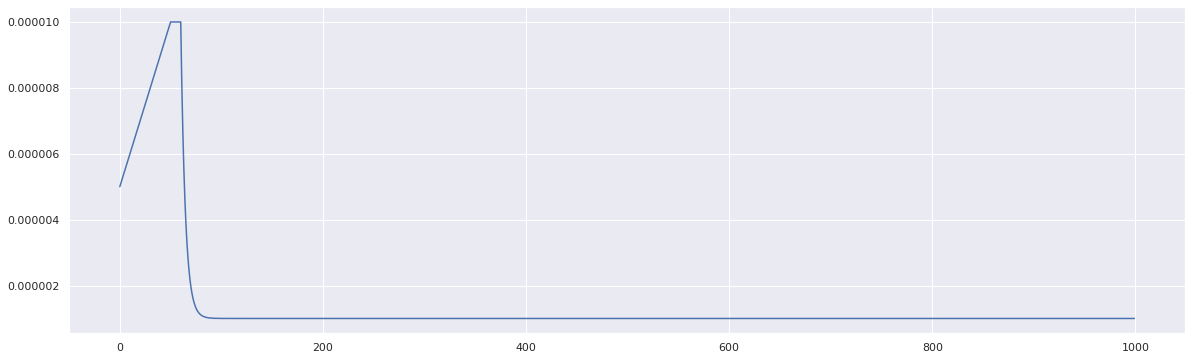

In [358]:
"""lr from kaggle leaf"""
ep_num = 1000

lr_start   = 0.000005
lr_max     = 0.00000125 * strategy.num_replicas_in_sync * BATCH_SIZE
lr_min     = 0.000001
lr_ramp_ep = 50
lr_sus_ep  = 10
lr_decay   = 0.8

def lrfn2(epoch):
    if epoch < lr_ramp_ep:
        lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = lr_max

    else:
        lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min

    return lr



rng = [i for i in range(ep_num)]
y = [lrfn2(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

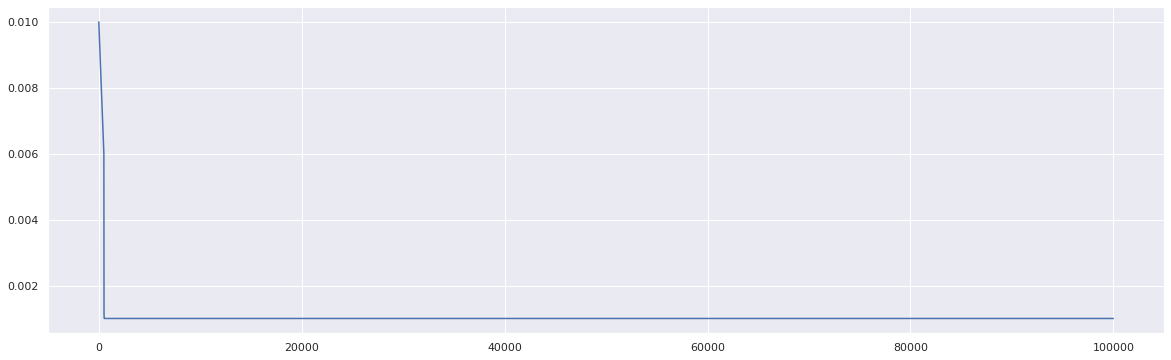

In [359]:
"""dump lr
"""
ep_num = 100000

step_size = 100
lr_max = 0.006
lr_min = 0.001
lr_start = 0.01

lr_init_ep = 0
lr_ramp_ep = 500
lr_sus_ep  = 0
lr_decay   = 0.8

def lrdump(epoch):
    if lr_init_ep -1 < epoch < lr_ramp_ep:
        lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = lr_max

    else:
        lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min

    return lr

rng = [i for i in range(ep_num)]
y = [lrdump(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

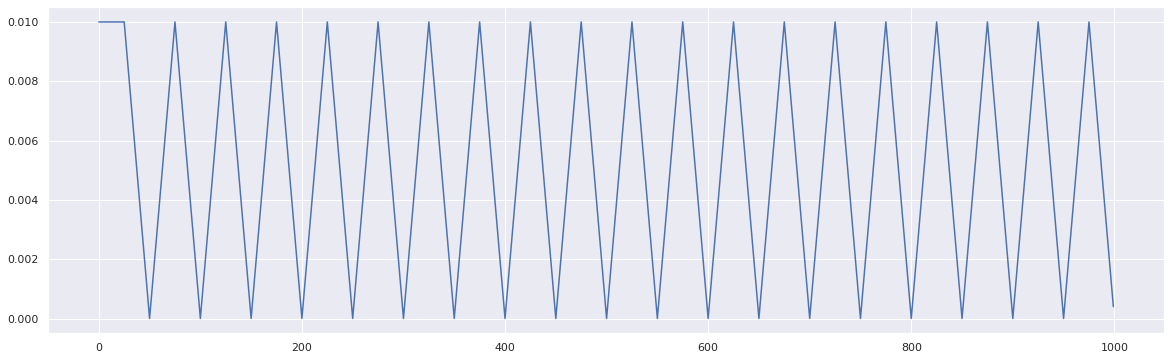

In [360]:

""" simple Cyclical Learning Rate (CLR)
https://www.tensorflow.org/addons/api_docs/python/tfa/optimizers/CyclicalLearningRate
https://github.com/bckenstler/CLR
"""

ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 # currently best for foot pp
base_lr = 0.000001# currently best for foot pp 1e-6

# step_size = 25
# boost_lr = 1e-1
# max_lr = 0.01 #1e-4 #0.01
# base_lr = 0.000001 #1e-12#0.000001
  
def clr(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
    initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
    lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
#     decay = ((epoch+1)/ep_num)
#     base_part = 1.01 #1.1
#     print(decay)
#     return lr* (base_part-decay)

    return lr


rng = [i for i in range(ep_num)]
y = [clr(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

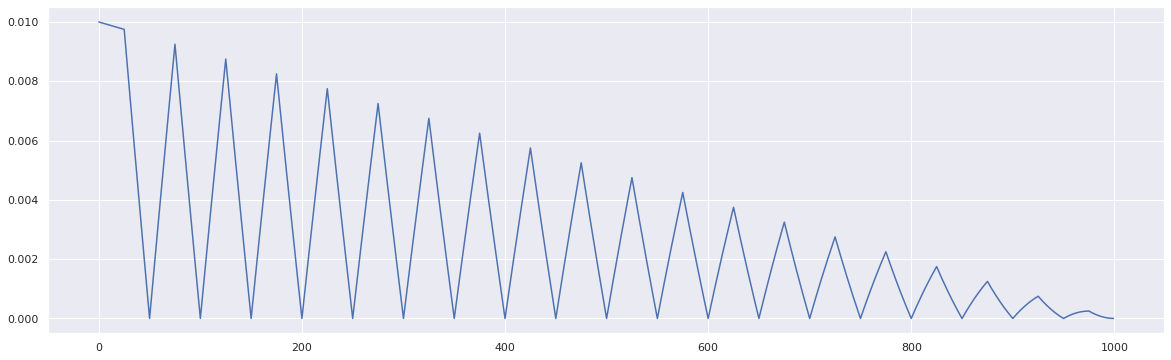

In [361]:

ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 # currently best for foot pp
base_lr = 0.000001# 1e-6 1e-7

def clr2(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
    initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
    lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
    decay = ((epoch+1)/ep_num)
    base_part = 1.001 #1.1
#     print(decay)
    return lr* (base_part-decay)


rng = [i for i in range(ep_num)]
y = [clr2(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

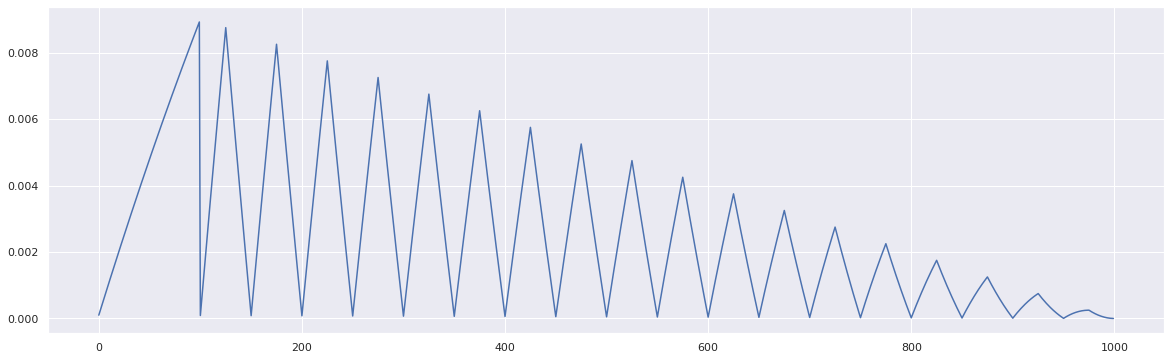

In [362]:
# clr3
# warm up 10% of epoch: it can reduce fall in local min in inital steps.


ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 # currently best for foot pp
base_lr = 1e-4 # 1e-6 1e-7

# warm up
lr_init_ep = 0
lr_ramp_ep = 100
lr_sus_ep  = 0
lr_decay   = 0.8


def clr3(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
#     initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
#     lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
    # warm up
    if epoch < lr_ramp_ep:
        lr = (max_lr - base_lr) / lr_ramp_ep * epoch + base_lr
    
    decay = ((epoch+1)/ep_num)
    base_part = 1.001 #1.1
#     print(decay)
    return lr * (base_part-decay)


rng = [i for i in range(ep_num)]
y = [clr3(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

CPU times: user 553 ms, sys: 40.4 ms, total: 593 ms
Wall time: 495 ms


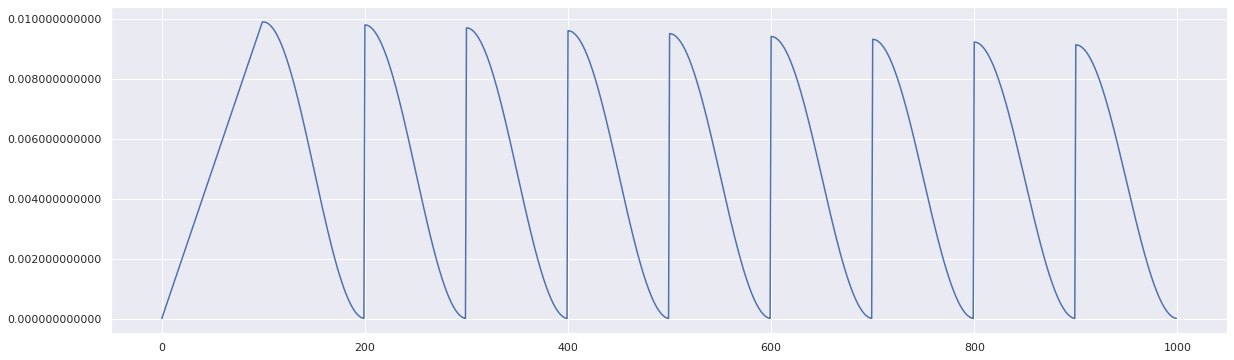

In [363]:
%%time
"""
cosine_decay_restarts是cosine_decay的cycle版本。
first_decay_steps是指第一次完全下降的step數，
t_mul是指每一次循環的步數都將乘以t_mul倍，
m_mul指每一次循環重新開始時的初始lr是上一次循環初始值的m_mul倍。
"""

from matplotlib.ticker import FormatStrFormatter



ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 # currently best for foot pp
base_lr = 0.000001# 1e-6 1e-7

# warm up
lr_init_ep = 0
lr_ramp_ep = 100
lr_sus_ep  = 0
lr_decay   = 0.8

    
initial_learning_rate = 1e-2
first_decay_steps = 100


lr_decayed_fn = (
  tf.keras.experimental.CosineDecayRestarts(
      initial_learning_rate,
      first_decay_steps,
      t_mul=1.,
      m_mul=.99,
      alpha = 0.0001,
      name="CCosineCLRDecay"))

def CCosineCLRDecayWarmUp(epoch):
    # warm up
    if epoch < lr_ramp_ep:
        lr = (max_lr - base_lr) / lr_ramp_ep * epoch + base_lr    
    else:
        lr = lr_decayed_fn(epoch)
    return lr



rng = [i for i in range(ep_num)]
y = [CCosineCLRDecayWarmUp(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
# plt.ylim(.0000000000000001, .01)# for too large loss
ax.yaxis.set_major_formatter(FormatStrFormatter('%.12f'))# for too small loss
plt.plot(rng, y)

In [364]:
print('{} ~ {}'.format(min(y), max(y)))

1e-06 ~ 0.00990001


In [365]:
for e, lr in zip(rng,y):
    print('{}\t {}\n'.format(e, lr))

0	 1e-06

1	 0.00010099000000000001

2	 0.00020098000000000002

3	 0.00030097000000000007

4	 0.00040096000000000006

5	 0.0005009500000000001

6	 0.0006009400000000001

7	 0.0007009300000000001

8	 0.0008009200000000001

9	 0.0009009100000000001

10	 0.0010009

11	 0.00110089

12	 0.00120088

13	 0.00130087

14	 0.00140086

15	 0.00150085

16	 0.00160084

17	 0.0017008300000000002

18	 0.00180082

19	 0.0019008100000000002

20	 0.0020008000000000005

21	 0.0021007900000000004

22	 0.0022007800000000003

23	 0.00230077

24	 0.0024007600000000005

25	 0.0025007500000000004

26	 0.0026007400000000003

27	 0.0027007300000000006

28	 0.0028007200000000005

29	 0.0029007100000000004

30	 0.0030007000000000002

31	 0.0031006900000000006

32	 0.0032006800000000005

33	 0.0033006700000000003

34	 0.0034006600000000007

35	 0.0035006500000000005

36	 0.0036006400000000004

37	 0.0037006300000000003

38	 0.0038006200000000006

39	 0.0039006100000000005

40	 0.004000600000000001

41	 0.00410059



In [366]:
# lr_reduceonplateau = tf.keras.callbacks.ReduceLROnPlateau(monitor=monitor, factor=0.1, patience=5, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=1e-12)

In [367]:
# Callback for printing the LR at the end of each epoch.
class PrintLRtoe(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
#     def on_epoch_end(self, epoch, logs=None):
#         print('\n[{}] Learning rate for epoch {} is {}'.format(
#             datetime.now().strftime("%Y%m%d-%H%M-%S"), 
#             epoch + 1,
#             self.model.optimizer.lr.numpy()))
        print('\n[{}] Learning rate for epoch {} is {}'.format(
        datetime.now().strftime("%Y%m%d-%H%M-%S"), 
        epoch + 1,
        model_toe.optimizer._decayed_lr(tf.float32).numpy()))

In [368]:
# Callback for printing the LR at the end of each epoch.
class PrintLRheel(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
#         print('\nLearning rate for epoch {} is {}'.format(epoch + 1,
#                                               model_heel.optimizer.lr.numpy()))
        print('\n[{}] Learning rate for epoch {} is {}'.format(
        datetime.now().strftime("%Y%m%d-%H%M-%S"), 
        epoch + 1,
        model_heel.optimizer._decayed_lr(tf.float32).numpy()))

### Output dir and models

In [369]:
def mk_log_dir(log_dir_name):
    try:
        os.makedirs(log_dir_name)
    except OSError as e:
        print("This log dir exist.")
        if e.errno != errno.EEXIST:
            raise ValueError("we got problem.")

In [370]:
monitor = 'val_loss' #'val_loss' 'val_accuracy' if use ed_loss it still the loss here.

log_dir_name = datetime.now().strftime("%Y%m%d-%H%M%S") 

# mk_log_dir(datetime.now().strftime("%Y%m%d-%H%M%S") )  

In [371]:
# use once at the time
mk_log_dir(log_dir_name)

# Toe

In [372]:
model_name = 'EfficientNetB0'

In [373]:
#get_best_model_name

# best_model_name = './' + model_name + '_bs-' + str(BATCH_SIZE) + '_s-' + str(img_height) + '_' + "ep-{epoch:02d}-vloss-{val_loss:.2f}" +'_best-weight.h5'
# best_model_name = '{model_name}-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
#best_model_name = './' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_' + monitor + '_best.h5'
# best_model_name = './Leaf_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '_best_' + monitor + '.h5'

# best_model_name = './cop' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '_best_' + monitor + '.h5'

def get_best_model_name(th):
    return './' + log_dir_name + '/' + th + '_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_best_' + monitor + '.h5'

th = 'toe'
# th = 'heel'

print(get_best_model_name(th))

best_model_name = get_best_model_name(th)


best_model_save = tf.keras.callbacks.ModelCheckpoint(filepath=best_model_name, 
                             save_best_only = True, 
                             save_weights_only = False,
                             monitor = monitor, 
                             mode = 'auto', verbose = 1)
print('best_model_name:', best_model_name)

./20210128-100801/toe_EfficientNetB0_bs1_w120_best_val_loss.h5
best_model_name: ./20210128-100801/toe_EfficientNetB0_bs1_w120_best_val_loss.h5


In [374]:
logdir = log_dir_name + "/logs/toe/"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [375]:
callbacks = [
    tensorboard_callback,
    best_model_save,
    tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=ep_num), #patience=step_size or ep_num
#     lr_reduceonplateau,
    tf.keras.callbacks.LearningRateScheduler(clr3),#lrdump, decay or lrfn or lrfn2. clr
    PrintLRtoe()
]

In [376]:
# create keras model

# model_name = 'EfficientNetB0'

dropout_rate = 0.8 #less dp rate, say 0.1, train_loss will lower than val_loss


with strategy.scope():
    
    base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet",drop_connect_rate=0.8) #{'imagenet', None}

    # Freeze the pretrained weights
    base_model.trainable = False
    print("base_model.trainable : ", base_model.trainable)

    # Rebuild top
    gap2d = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    BNL = tf.keras.layers.BatchNormalization()(gap2d) #tood: remove#
    dropout = tf.keras.layers.Dropout(dropout_rate)(BNL)#tood: remove# J add dropout, for flood 0.2 is ok. for leaf 0.4 is better.
    outputs = tf.keras.layers.Dense(2)(dropout)# remove activation for regression output (to default, the linear)

    # Compile new model
    model_toe = tf.keras.Model(base_model.input, outputs, name=model_name)


    # unfreeze the top #fine_tune_at# layers while leaving BatchNorm layers frozen
    fine_tune_at = 20 #241 #20
    print('[Note] Now create model fine tuneing at Top-{} layers!'.format(fine_tune_at))
    for layer in model_toe.layers[-fine_tune_at:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True

    model_toe.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),#RMSprop , Adam, SGD Adadelta(learning_rate=0.001), if set lr_callback the learning_rate=0.001 will not effeced.
                    loss=ed_metric_2d_mean)#,#, ed_loss ed_metric_2d ed_metric_2d_mean            
                    #metrics=['mae', 'accuracy'])



# # AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-14, rectify=False)
# model_toe.compile(optimizer = AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-14, rectify=False),#RMSprop , Adam, SGD Adadelta(learning_rate=0.001), if set lr_callback the learning_rate=0.001 will not effeced.
#                 loss=ed_metric_2d_mean)#,#, ed_loss ed_metric_2d ed_metric_2d_mean            
#                 #metrics=['mae', 'accuracy'])

base_model.trainable :  False
[Note] Now create model fine tuneing at Top-20 layers!


In [377]:
len(model_toe.layers)

241

In [ ]:
%%time

# fit the model on all data
history_toe = model_toe.fit(train_ds_pre_toe_s, 
                      verbose=1, 
                      epochs=ep_num, 
                      validation_data=valid_ds_pre_toe_s, 
                      callbacks=callbacks)#, validation_split=0.1)


[20210128-1008-09] Learning rate for epoch 1 is 9.999999974752427e-07
Epoch 1/1000
INFO:tensorflow:batch_all_reduce: 12 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 12 all-reduces with algorithm = nccl, num_packs = 1
267/269 [============================>.] - ETA: 0s - loss: 81.6888
Epoch 00001: val_loss did not improve from inf
269/269 [==============================] - 39s 144ms/step - loss: 81.6857 - val_loss: nan

[20210128-1009-32] Learning rate for epoch 2 is 0.00010088901035487652
Epoch 2/1000
268/269 [============================>.] - ETA: 0s - loss: 79.6578
Epoch 00002: val_loss did not improve from inf
269/269 [==============================] - 8s 30ms/step - loss: 79.6635 - val_loss: nan

[20210128-1009-40] Learning rate for epoch 3 is 0.00020057804067619145
Epoch 3/1000
269/269 [==============================] - ETA: 0s - loss: 62.4040
Epoch 00003: val_loss did not improve from inf
269/269 [==============================] - 8s 31ms/ste

In [ ]:
# model_toe.summary()

In [ ]:
# tf.keras.utils.plot_model(model_toe, show_shapes=True)

In [ ]:
# show after modl.fit
model_toe.metrics_names

In [ ]:
# check metrics the model have.
history_toe.history.keys()

In [ ]:
# check the loos the model trained.
plt.figure(figsize=(25, 10))
plt.plot(history_toe.history['loss'])
plt.plot(history_toe.history['val_loss'])
plt.title('model ed loss')
plt.ylabel('ed loss'), plt.ylim(5, 7)# for too large loss
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left') 
plt.show()


In [ ]:
# check the loos the model trained.

# for different scales (different Y-axes)
# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(25, 10))

# nice to have this colorful tip.
color = 'tab:red'

ax1.set_title('model ed loss')

ax1.set_xlabel('epoch')
ax1.set_ylabel('ed loss', color=color)

ax1.plot(history_toe.history['loss'])
ax1.plot(history_toe.history['val_loss'])
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['loss', 'val_loss'], loc='upper center') # legend may ocvered by next ax ploting. moved to end.


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('learning rate', color=color)
ax2.plot(history_toe.history['lr'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


## Check the mean-Euclidean Distance of test data

may modify the ed-loss function

In [ ]:
# mean ed-loss == mean ed of test data.
model_toe.evaluate(valid_ds_pre_toe_s)

# Heel 

In [ ]:
# HEEL CLR2 special case!!!

ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 #0.01 # currently best for foot pp
base_lr = 1e-6 #0.0000001#  1e-7

def clr2_heel(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
    initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
    lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
    decay = ((epoch+1)/ep_num)
    base_part = 1.01 #1.1
#     print(decay)
    return lr* (base_part-decay)


rng = [i for i in range(ep_num)]
y = [clr2_heel(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)





# ep_num = 500

# step_size = 20 # currently best for foot pp
# max_lr = 0.01 #0.01 # currently best for foot pp
# base_lr = 1e-4 #0.0000001#  1e-7

# def clr2_heel(epoch):
#     iterations = epoch
#     cycle = np.floor(1+iterations/(2*step_size))
#     x = np.abs(iterations/step_size - 2*cycle + 1)
#     lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
#     #todo: boost the lr at initial setps.
#     if epoch < 20:
#         lr = max_lr
# #     if 100 < epoch < 150 :
# #         lr = max_lr * 1.105

    
#     decay = ((epoch+1)/ep_num)
#     base_part = 1.01 #1.1
# #     print(decay)
#     return lr* (base_part-decay)


# rng = [i for i in range(ep_num)]
# y = [clr2_heel(x) for x in rng]
# sns.set(style='darkgrid')
# fig, ax = plt.subplots(figsize=(20, 6))
# plt.plot(rng, y)





In [ ]:
"""

"""
# lr_reduceonplateau = tf.keras.callbacks.ReduceLROnPlateau(monitor=monitor, 
#                                                           factor=0.5, 
#                                                           patience=15, 
#                                                           verbose=1, 
#                                                           mode='auto', 
#                                                           #min_delta=0.0001, 
#                                                           cooldown=5, 
#                                                           #min_lr=1e-12
#                                                          )

In [ ]:
def get_best_model_name(th):
    return './' + log_dir_name + '/' + th + '_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_best_' + monitor + '.h5'

# th = 'toe'
th = 'heel'

print(get_best_model_name(th))

best_model_name = get_best_model_name(th)


best_model_save = tf.keras.callbacks.ModelCheckpoint(filepath=best_model_name, 
                             save_best_only = True, 
                             save_weights_only = False,
                             monitor = monitor, 
                             mode = 'auto', verbose = 1)
print('best_model_name:', best_model_name)

In [ ]:
logdir = log_dir_name + "/logs/heel/"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
callbacks = [
    tensorboard_callback,
    best_model_save,
    tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=ep_num), #patience=step_size ot ep_num
    tf.keras.callbacks.LearningRateScheduler(clr3),#,clr2_heel  lrfn2_heel decay or lrfn or lrfn2. clr
#     lr_reduceonplateau,
    PrintLRheel()
]

In [ ]:
# create keras model

model_name = 'EfficientNetB0'

dropout_rate = 0.7 #less dp rate, say 0.1, train_loss will lower than val_loss

with strategy.scope():

    base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet',drop_connect_rate=0.7)

    # Freeze the pretrained weights
    base_model.trainable = False

    # Rebuild top
    gap2d = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    BNL = tf.keras.layers.BatchNormalization()(gap2d) #tood: remove#
    dropout = tf.keras.layers.Dropout(dropout_rate)(BNL)#tood: remove# J add dropout, for flood 0.2 is ok. for leaf 0.4 is better.
    outputs = tf.keras.layers.Dense(2)(dropout)# remove activation for regression output (to default, the linear)

    # Compile new model
    model_heel = tf.keras.Model(base_model.input, outputs, name=model_name)


    # unfreeze the top #fine_tune_at# layers while leaving BatchNorm layers frozen
    fine_tune_at = 20
    for layer in model_heel.layers[-fine_tune_at:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
          layer.trainable = True

    model_heel.compile(optimizer = tf.keras.optimizers.Adam(0.01),#RMSprop , Adam
                    loss=ed_metric_2d_mean)#, ed_loss ed_metric_2d ed_metric_2d_mean            
                    #metrics=['mae', 'accuracy'])


In [ ]:
%%time

# fit the model on all data
history_heel = model_heel.fit(train_ds_pre_heel_s, 
                      verbose=1, 
                      epochs=ep_num, 
                      validation_data=valid_ds_pre_heel_s, 
                      callbacks=callbacks)

In [ ]:
# check the loos the model trained.
plt.figure(figsize=(25, 10))
plt.plot(history_heel.history['loss'])
plt.plot(history_heel.history['val_loss'])
plt.title('model ed loss')
plt.ylabel('ed loss'), plt.ylim(3, 10)# for too large loss
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left') 
plt.show()

In [ ]:
# check the loos the model trained.


# for different scales (different Y-axes)
# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(25, 10))

# nice to have this colorful tip.
color = 'tab:red'

ax1.set_title('model ed loss')

ax1.set_xlabel('epoch')
ax1.set_ylabel('ed loss', color=color)

ax1.plot(history_heel.history['loss'])
ax1.plot(history_heel.history['val_loss'])
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['loss', 'val_loss'], loc='upper center') # legend may ocvered by next ax ploting. moved to end.


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('learning rate', color=color)
ax2.plot(history_heel.history['lr'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


In [ ]:
# mean ed-loss == mean ed of test data.
model_heel.evaluate(valid_ds_pre_heel_s)

## Show predictions

In [ ]:
%%time
# inference all val_ds
predictions = model.predict(valid_ds_pre_toe_s)

In [ ]:
predictions.shape

In [ ]:
predictions[:5]

In [ ]:
%%time

# inference bs by bs of val_ds #model.predict()#一次做完即可不用分batch
image_batch, label_batch = valid_ds_pre_heel_s.as_numpy_iterator().next()
pred = model.predict_on_batch(image_batch)

In [ ]:
image_batch.shape

In [ ]:
pred.shape

In [ ]:
pred[:5]

In [ ]:
label_batch[:5]

In [ ]:
#test_ds一次做完即可不用分batch
neg = label_batch - pred
neg[:5]

In [ ]:
neg[:5]

In [ ]:
neg.mean()#所有x,y平均

In [ ]:
neg.mean(axis=0)#所有x 所有y個別平均

In [ ]:
neg.mean(axis=1)#左x右y相加的平均

In [ ]:
np.median(neg)#中位數

In [ ]:
neg.min(axis=0)

In [ ]:
neg.max(axis=0)

In [ ]:
model.metrics_names

## show pp pred

* we can switch toe/hell by comment it

### Baseline Simple2D model

In [ ]:
it_valid_ds_pre_toe_s = iter(valid_ds_pre_toe_s)
# it_valid_ds_pre_heel_s = iter(valid_ds_pre_heel_s)

In [ ]:
%%time

# image_batch, label_batch = next(valid_ds_pre_toe_s)

image_batch, label_batch = next(it_valid_ds_pre_toe_s)
# image_batch, label_batch = next(it_valid_ds_pre_heel_s)


# pred = model_toe.predict_on_batch(image_batch) #predictions
pred = model.predict_on_batch(image_batch) #Simple 2D CNN model predictions

plt.figure(figsize=(20, 20))
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(image_batch[i])
    plt.title(label_batch[i].numpy())
    plt.axis("off")
    
    # note: y_offset_toe for ds image
    
    #ground truth
    plt.plot(label_batch[i].numpy()[0], label_batch[i].numpy()[1], 'r+', markersize=15, mew=4)

    #pred
    plt.plot(pred[i][0], pred[i][1], 'k+', markersize=15, mew=4)

### EFN Toe

In [ ]:
it_valid_ds_pre_toe_s = iter(valid_ds_pre_toe_s)
# it_valid_ds_pre_heel_s = iter(valid_ds_pre_heel_s)

In [ ]:
%%time

# image_batch, label_batch = next(valid_ds_pre_toe_s)

image_batch, label_batch = next(it_valid_ds_pre_toe_s)
# image_batch, label_batch = next(it_valid_ds_pre_heel_s)


pred = model_toe.predict_on_batch(image_batch) #predictions
# pred = model.predict_on_batch(image_batch) #Simple 2D CNN model predictions

plt.figure(figsize=(20, 20))
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(image_batch[i])
    plt.title(label_batch[i].numpy())
    plt.axis("off")
    
    # note: y_offset_toe for ds image
    
    #ground truth
    plt.plot(label_batch[i].numpy()[0], label_batch[i].numpy()[1], 'r+', markersize=15, mew=4)

    #pred
    plt.plot(pred[i][0], pred[i][1], 'k+', markersize=15, mew=4)

In [ ]:
#test_ds一次做完即可不用分batch
neg = label_batch - pred
neg[:5]

In [ ]:
np.abs(neg)[:5]

In [ ]:
neg_abs = np.abs(neg)
neg_abs.mean(axis=0)#所有x 所有y個別平均  neg.mean(axis=0)#所有x 所有y個別平均

#### ED 2D

In [ ]:
# y_pred = neg_abs.mean(axis=0)
ed_metric_2d([0,0], [neg_abs.mean(axis=0)]).numpy()

### EFN Heel

In [ ]:
# it_valid_ds_pre_toe_s = iter(valid_ds_pre_toe_s)
it_valid_ds_pre_heel_s = iter(valid_ds_pre_heel_s)

In [ ]:
%%time

# image_batch, label_batch = next(valid_ds_pre_toe_s)

# image_batch, label_batch = next(it_valid_ds_pre_toe_s)
image_batch, label_batch = next(it_valid_ds_pre_heel_s)


pred = model_heel.predict_on_batch(image_batch) #predictions
# pred = model.predict_on_batch(image_batch) #Simple 2D CNN model predictions

plt.figure(figsize=(20, 20))
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(image_batch[i])
    plt.title(label_batch[i].numpy())
    plt.axis("off")
    
    # note: y_offset_toe for ds image
    
    #ground truth
    plt.plot(label_batch[i].numpy()[0], label_batch[i].numpy()[1], 'r+', markersize=15, mew=4)

    #pred
    plt.plot(pred[i][0], pred[i][1], 'k+', markersize=15, mew=4)

In [ ]:
pred[:5]

In [ ]:
label_batch[:5]

In [ ]:
#test_ds一次做完即可不用分batch
neg = label_batch - pred
neg[:10]

In [ ]:
np.abs(neg)[:10]

In [ ]:
neg_abs = np.abs(neg)
neg_abs.mean(axis=0)#所有x 所有y個別平均  neg.mean(axis=0)#所有x 所有y個別平均

#### ED 2d

In [ ]:
# y_pred = neg_abs.mean(axis=0)
ed_metric_2d([0,0], [neg_abs.mean(axis=0)]).numpy()

# Merg Toe/Heel model and predict the Test data at once

### Create TEST DS

In [ ]:
ts = 'test_submission.csv'
df_ts = pd.read_csv(ts)
df_ts.head(5)

In [ ]:
df_ts['images']

In [ ]:
# from dataframe
list_ds_test = tf.data.Dataset.from_tensor_slices(df_ts['images'])


In [ ]:
len(list_ds_test)#.shape() #take(1)

In [ ]:
# check The type specification of an element of this dataset.
list_ds_test.element_spec

In [ ]:
for f in list_ds_test.take(5):
    print(f'take test sample: {f}')

### TEST DS: Process TEST path to image tensor

In [ ]:
## TEST-DS: re-used from train/val-ds

im_test = 'test_images/'

'''
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    boolen = parts[-2] == class_names
    #one_hot_num = np.array(boolen, dtype=np.int) not works should use tf.x repalced.
    one_hot_num = tf.dtypes.cast(boolen, tf.int64)
    one_num = tf.argmax(one_hot_num)
    print('one_num:', one_num)
    # Integer encode the label
    return one_num

def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_jpeg(img, channels=3)
    # resize the image to the desired size
#     return tf.image.resize(img, [img_height, img_width])# augment 已經resize過一次了 但這邊不先做會比較慢
    return tf.cast(tf.image.resize(img, [img_height, img_width]), tf.uint8)# 避免float over at augment
'''

#
# map list to ds, Toe part.
#

def decode_crop_png_toe_test(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
    y1=y_offset_toe;    x1=0;    h=img_height;    w=img_width # not the pp location
    img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), h, w)
    #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
    # resize the image to the desired size
    return img

def process_path_toe_test(file_name):
    file_path = im_test + file_name
    #label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
    img = decode_crop_png_toe_test(img)
    return img, file_name

#
# map list to ds, Heel part.
#

def decode_crop_png_heel_test(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
    y2=y_offset_heel;    x2=0;    h=img_height;    w=img_width # not the pp location
    img = tf.image.crop_to_bounding_box(img, int(y2), int(x2), h, w)
    #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
    # resize the image to the desired size
    return img

def process_path_heel_test(file_name):
    file_path = im_test + file_name
    #label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
    img = decode_crop_png_heel_test(img)
    return img, file_name


#
# test how to put parameters to map
#

def t_ds_map(file_path,x1,y1,x2,y2):
#     img = get_img('train/images/' + str(file_path))
#     print(file_path)
    return file_path,x1,y1,x2,y2 #img, [x1,y1]
    

In [ ]:
# TEST Toe ds
test_ds_map_toe = list_ds_test.map(process_path_toe_test, num_parallel_calls=AUTOTUNE)

# TEST Heel ds
test_ds_map_heel = list_ds_test.map(process_path_heel_test, num_parallel_calls=AUTOTUNE)

In [ ]:
for img, file_name in test_ds_map_toe.take(5):
    print(f'take sample: {img.shape} {file_name}')
    
print('f', f.dtype)
print('xy', xy.dtype)

### prepare TEST_ds_pre

In [ ]:
def configure_for_performance_cache_test(ds, cache=True):

    if cache:
        ds = ds.cache()
        print("Check cache in memory:Y", cache)
    else:
        print("Check cache in memory:N", cache)
        
#     if augment:
# #         ds = ds.map(data_augment, num_parallel_calls=AUTOTUNE)
#         ds = ds.map(AA, num_parallel_calls=AUTOTUNE)
# #         ds = ds.map(RA, num_parallel_calls=AUTOTUNE)
#         print("Check augment :Y", augment)
#     else:
#         print("Check augment :N", augment)
    
#     #ds = ds.repeat()#TODO:2020-12-14: test
#     ds = ds.shuffle(buffer_size=MULTI_BATCH_SIZE*2) # (buffer_size=MULTI_BATCH_SIZE*5) 6sec,buffer_size=1000 take few sec. or buffer_size=image_count <- take too long # each take ds take 30~45 sec, TODO!!
#     ds = ds.shuffle(len(list_ds), reshuffle_each_iteration=False) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
    ds = ds.batch(1000)# 1k for foot test images #MULTI_BATCH_SIZE for multi-GPUs
    ds = ds.prefetch(buffer_size=AUTOTUNE) #buffer_size=AUTOTUNE seem no speed improve
    
    return ds


In [ ]:
"""
Prepare the ds properties (cache, augment, bs, shuffle, prefetch, etc.) for better performance.
"""
# TEST Toe ds_pre
test_ds_pre_toe = configure_for_performance_cache_test(test_ds_map_toe)

# TEST Heel ds_pre
test_ds_pre_heel = configure_for_performance_cache_test(test_ds_map_heel)

## Predict test (abandon)

### Toe model

In [ ]:
model_toe

In [ ]:
%%time
# inference all test_ds once
predictions_toe = model_toe.predict(test_ds_pre_toe)
predictions_toe.shape

In [ ]:
predictions_toe

### Offset Toe

In [ ]:
predictions_toe[:,1] = predictions_toe[:,1] + y_offset_toe
predictions_toe

### Heel model

In [ ]:
%%time
# inference all test_ds once
predictions_heel = model_heel.predict(test_ds_pre_heel)
predictions_heel.shape

In [ ]:
predictions_heel

### Offset Heel

In [ ]:
predictions_heel[:,1] = predictions_heel[:,1] + y_offset_heel
predictions_heel

### Merge toe/hell pred

In [ ]:
predictions_th = np.append(predictions_toe, predictions_heel, axis=1)#左右接
predictions_th.shape

In [ ]:
predictions_th.shape

In [ ]:
images_name = np.expand_dims(df_ts['images'], axis=1)
images_name.shape

In [ ]:
predictions_merge = np.append(images_name, predictions_th, axis=1)#左右接
predictions_merge.shape

In [ ]:
predictions_merge.take(0)

In [ ]:
df_submission = pd.DataFrame(predictions_merge)
df_submission.columns = ['images','x1','y1','x2','y2']

In [ ]:
df_submission.head(5)

In [ ]:
df_submission.to_csv('submission.csv', index=False)

# Load Best-model

In [ ]:
# if models are in last time frame
best_model_toe_name = get_best_model_name('toe')
best_model_heel_name = get_best_model_name('heel')

# # if toe/heel are in different time frame
# best_model_toe_name = '20210118-212454/toe_EfficientNetB0_bs64_w120_best_val_loss.h5'#6.3318 @e393
# best_model_heel_name = '20210122-084854/heel_EfficientNetB0_bs64_w120_best_val_loss.h5'#3.27979@152




print(best_model_toe_name)
print(best_model_heel_name)
# log_dir_name + '/' + 'leaf-2020-12-01-EfficientNetB7_top-layer50_lr_lrfn_val-acc.8352_wh512_e37.h5'

best_model_toe = tf.keras.models.load_model(best_model_toe_name,compile=False)
best_model_heel = tf.keras.models.load_model(best_model_heel_name,compile=False)

### compile the model separately afterwards. to load model with custom loss function

* https://github.com/tensorflow/tensorflow/issues/32348

In [ ]:
best_model_toe.compile(optimizer = tf.keras.optimizers.Adam(),#RMSprop , Adam
                loss=ed_metric_2d_mean)#, ed_loss ed_metric_2d ed_metric_2d_mean            
                #metrics=['mae', 'accuracy'])
best_model_heel.compile(optimizer = tf.keras.optimizers.Adam(),#RMSprop , Adam
                loss=ed_metric_2d_mean)#, ed_loss ed_metric_2d ed_metric_2d_mean            
                #metrics=['mae', 'accuracy'])


In [ ]:
%%time
# inference all test_ds once
predictions_toe = best_model_toe.predict(test_ds_pre_toe)
predictions_toe.shape

### Offset Toe

In [ ]:
predictions_toe[:,1] = predictions_toe[:,1] + y_offset_toe
predictions_toe

In [ ]:
%%time
# inference all test_ds once
predictions_heel = best_model_heel.predict(test_ds_pre_heel)
predictions_heel.shape

### Offset Heel

In [ ]:
predictions_heel[:,1] = predictions_heel[:,1] + y_offset_heel
predictions_heel

### Merge toe/hell pred

In [ ]:
predictions_th = np.append(predictions_toe, predictions_heel, axis=1)#左右接
predictions_th.shape

In [ ]:
images_name = np.expand_dims(df_ts['images'], axis=1)
images_name.shape

In [ ]:
predictions_merge = np.append(images_name, predictions_th, axis=1)#左右接
predictions_merge.shape

In [ ]:
df_submission = pd.DataFrame(predictions_merge)
df_submission.columns = ['images','x1','y1','x2','y2']

In [ ]:
submi_name = 'Bth_clr3_2690_' + log_dir_name +'.csv'
df_submission.to_csv(submi_name, index=False)
print('Save {} as submission CSV.'.format(submi_name))

In [ ]:
#

## save model

In [ ]:

best_model_name = './cop_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_e' + str(ep_num) + '_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '_.h5'
# model.save(best_model_name)
print("Save model: ", best_model_name)

## Reference

multi output model:
https://navoshta.com/end-to-end-deep-learning/

